In [ ]:
import pandas as pd
import io

from google.colab import files
data_to_load = files.upload()
    
df = pd.read_csv(io.BytesIO(data_to_load['covid19indo-all-bersih.csv']), error_bad_lines=False)

Saving covid19indo-all-bersih.csv to covid19indo-all-bersih (3).csv


In [ ]:
df.head(15)

,Date,Meninggal (baru),Sembuh (baru),Total Kasus,Meninggal,Sembuh,Aktif,Kasus Baru,Persentase Spesimen Positif (Orang),Persentase Penambahan Kasus,Suspek,Spesiment Baru (Orang),Test (Orang),Test (Spesimen),Tingkat Kematian,Tingkat Kesembuhan,Persentase Aktif
0,2020-03-02,0,0,2,0,0,2,2,0.000000,0.000000,0,0,0,0,0.000000,0.000000,1.000000
1,2020-03-03,0,0,2,0,0,2,0,0.000000,0.000000,0,2,2,0,0.000000,0.000000,1.000000
2,2020-03-04,0,0,2,0,0,2,0,0.000000,0.000000,0,31,31,0,0.000000,0.000000,1.000000
3,2020-03-05,0,0,2,0,0,2,0,0.000000,0.000000,0,16,16,0,0.000000,0.000000,1.000000
4,2020-03-06,0,0,4,0,0,4,2,0.032258,1.000000,0,62,62,0,0.000000,0.000000,1.000000
5,2020-03-07,0,0,4,0,0,4,0,0.000000,0.000000,0,4,4,0,0.000000,0.000000,1.000000
6,2020-03-08,0,0,6,0,0,6,2,0.068966,0.500000,0,29,29,0,0.000000,0.000000,1.000000
7,2020-03-09,0,0,19,0,0,19,13,0.216667,2.166667,0,60,60,0,0.000000,0.000000,1.000000
8,2020-03-10,0,0,27,0,0,27,8,0.052980,0.421053,0,151,151,0,0.000000,0.000000,1.000000
9,2020-03-11,2,2,34,2,2,30,7,0.070707,0.259259,0,99,99,0,0.058824,0.058824,0.882353


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 231 non-null    object 
 1   Meninggal (baru)                     231 non-null    int64  
 2   Sembuh (baru)                        231 non-null    int64  
 3   Total Kasus                          231 non-null    int64  
 4   Meninggal                            231 non-null    int64  
 5   Sembuh                               231 non-null    int64  
 6   Aktif                                231 non-null    int64  
 7   Kasus Baru                           231 non-null    int64  
 8   Persentase Spesimen Positif (Orang)  231 non-null    float64
 9   Persentase Penambahan Kasus          231 non-null    float64
 10  Suspek                               231 non-null    int64  
 11  Spesiment Baru (Orang)          

In [ ]:
pip install fbprophet

In [ ]:
pip install dask

In [ ]:
pip install "dask[complete]"

In [ ]:
from warnings import simplefilter
simplefilter (action ='ignore', category=FutureWarning)

import dask.dataframe as dd
import dask.array as da

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [ ]:
df.corr()

,Meninggal (baru),Sembuh (baru),Total Kasus,Meninggal,Sembuh,Aktif,Kasus Baru,Persentase Spesimen Positif (Orang),Persentase Penambahan Kasus,Suspek,Spesiment Baru (Orang),Test (Orang),Test (Spesimen),Tingkat Kematian,Tingkat Kesembuhan,Persentase Aktif
Meninggal (baru),1.000000,0.864443,0.833765,0.869843,0.800704,0.896188,0.888703,-0.078718,-0.309134,0.087477,0.869629,0.869629,0.878245,-0.468186,0.892767,-0.893097
Sembuh (baru),0.864443,1.000000,0.968957,0.970892,0.959350,0.938764,0.950049,-0.067243,-0.234733,0.144525,0.936229,0.936229,0.905976,-0.546449,0.893176,-0.887150
Total Kasus,0.833765,0.968957,1.000000,0.993412,0.996086,0.947489,0.969245,-0.050001,-0.230682,0.177889,0.937457,0.937457,0.903958,-0.543666,0.888576,-0.882578
Meninggal,0.869843,0.970892,0.993412,1.000000,0.980865,0.971921,0.978850,-0.063413,-0.261406,0.168844,0.943660,0.943660,0.928058,-0.558299,0.933506,-0.928253
Sembuh,0.800704,0.959350,0.996086,0.980865,1.000000,0.915532,0.953059,-0.033804,-0.203000,0.185363,0.919727,0.919727,0.872918,-0.525038,0.849248,-0.843074
Aktif,0.896188,0.938764,0.947489,0.971921,0.915532,1.000000,0.962751,-0.105959,-0.314939,0.138790,0.939652,0.939652,0.956013,-0.574796,0.969549,-0.964505
Kasus Baru,0.888703,0.950049,0.969245,0.978850,0.953059,0.962751,1.000000,-0.049247,-0.263911,0.154198,0.944483,0.944483,0.946024,-0.542121,0.917192,-0.912554
Persentase Spesimen Positif (Orang),-0.078718,-0.067243,-0.050001,-0.063413,-0.033804,-0.105959,-0.049247,1.000000,0.088071,-0.181485,-0.151228,-0.151228,-0.119721,0.333150,-0.106432,0.083889
Persentase Penambahan Kasus,-0.309134,-0.234733,-0.230682,-0.261406,-0.203000,-0.314939,-0.263911,0.088071,1.000000,-0.229759,-0.274157,-0.274157,-0.297131,-0.122561,-0.340878,0.365539
Suspek,0.087477,0.144525,0.177889,0.168844,0.185363,0.138790,0.154198,-0.181485,-0.229759,1.000000,0.169819,0.169819,0.123508,0.152312,0.108553,-0.125631


In [ ]:
df_date = df.groupby('Date')[['Total Kasus','Sembuh','Meninggal','Aktif']].sum()
df_date.head(15)

,Total Kasus,Sembuh,Meninggal,Aktif
Date,,,,
2020-03-02,2,0,0,2
2020-03-03,2,0,0,2
2020-03-04,2,0,0,2
2020-03-05,2,0,0,2
2020-03-06,4,0,0,4
2020-03-07,4,0,0,4
2020-03-08,6,0,0,6
2020-03-09,19,0,0,19
2020-03-10,27,0,0,27


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

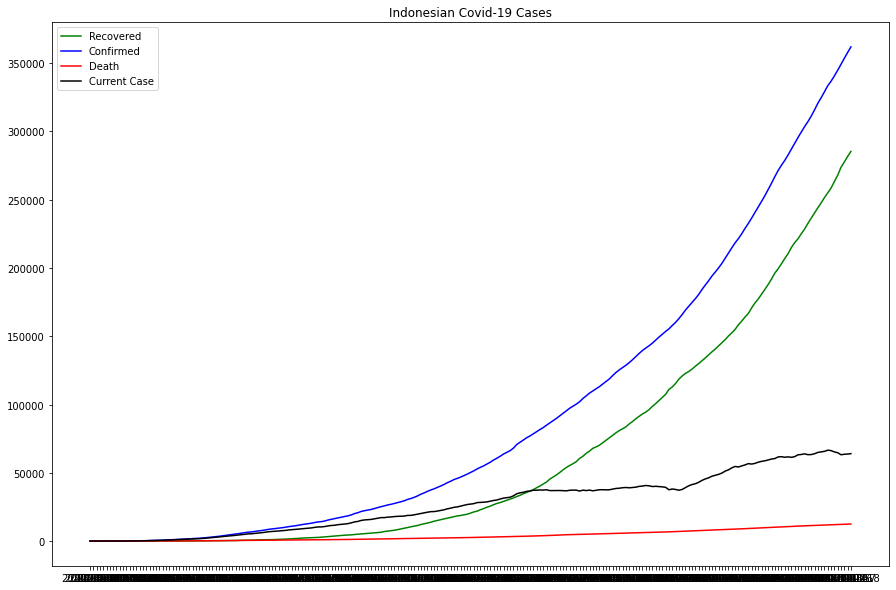

In [ ]:
plt.figure(figsize=(15,10))
plt.plot (df_date["Sembuh"], color='g', label='Recovered')
plt.plot (df_date["Total Kasus"], color='b', label='Confirmed')
plt.plot (df_date["Meninggal"], color='r', label='Death')
plt.plot (df_date["Aktif"], color='k', label='Current Case')
plt.title ('Indonesian Covid-19 Cases')
plt.legend()

In [ ]:
#Modelling

#Inisialization
from fbprophet import Prophet
model = Prophet()

#Adding seasonality
#30.42 is the average days in a month of a year
model.add_seasonality(name='Monthly', period=30.42, fourier_order=5)

In [ ]:
#Data Splitting Into Test and Training Sets

df_date_reset = df_date.reset_index()
df_recovered = df_date_reset[['Date','Sembuh']]
df_confirmed = df_date_reset[['Date','Total Kasus']]
df_death = df_date_reset[['Date','Meninggal']]
df_current_case = df_date_reset[['Date','Aktif']]

In [ ]:
#Using ds and y varibles tof prophet to predict

def rename_func (dataframe):
  cols = dataframe.columns
  dataframe = dataframe.rename(columns = {cols[0]: 'ds', cols[1]:'y'})
  return dataframe

In [ ]:
df_recovered = rename_func(df_recovered)
df_confirmed = rename_func(df_confirmed)
df_death = rename_func(df_death)
df_current_case = rename_func(df_current_case)

In [ ]:
df_current_case.head()

,ds,y
0,2020-03-02,2
1,2020-03-03,2
2,2020-03-04,2
3,2020-03-05,2
4,2020-03-06,4


In [ ]:
#dataframe is the dataframe to split, ratio is the training dataset ratio
def train_test_split(dataframe, ratio):
  divisor = round ((ratio/100)*dataframe.shape[0])
  train = dataframe.iloc[:divisor]
  test = dataframe.iloc[divisor:]
  return train, test, divisor

current_case_train, current_case_test, divisor = train_test_split(df_current_case,40)
current_case_train.shape, current_case_test.shape


((92, 2), (139, 2))

In [ ]:
#Model Fitting

model.fit(current_case_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Model Prediction
#Creating future date
future_date = model.make_future_dataframe(periods=127)

#Doing Prediction
prediction = model.predict(future_date)

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Monthly,Monthly_lower,Monthly_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-02,35.991901,-101.837304,107.966640,35.991901,35.991901,7.234242,7.234242,7.234242,-28.828107,-28.828107,-28.828107,-36.062348,-36.062348,-36.062348,0.0,0.0,0.0,7.163794
1,2020-03-03,53.272545,-141.338607,83.515058,53.272545,53.272545,-39.478176,-39.478176,-39.478176,-84.417691,-84.417691,-84.417691,-44.939515,-44.939515,-44.939515,0.0,0.0,0.0,-31.145146
2,2020-03-04,70.553190,-127.769591,89.570476,70.553190,70.553190,-66.657290,-66.657290,-66.657290,-90.435283,-90.435283,-90.435283,-23.777993,-23.777993,-23.777993,0.0,0.0,0.0,-19.882093
3,2020-03-05,87.833835,-100.022999,115.087470,87.833835,87.833835,-84.074936,-84.074936,-84.074936,-76.010679,-76.010679,-76.010679,8.064257,8.064257,8.064257,0.0,0.0,0.0,11.823156
4,2020-03-06,105.114480,-82.777070,131.158272,105.114480,105.114480,-100.527521,-100.527521,-100.527521,-79.956851,-79.956851,-79.956851,20.570670,20.570670,20.570670,0.0,0.0,0.0,25.157629


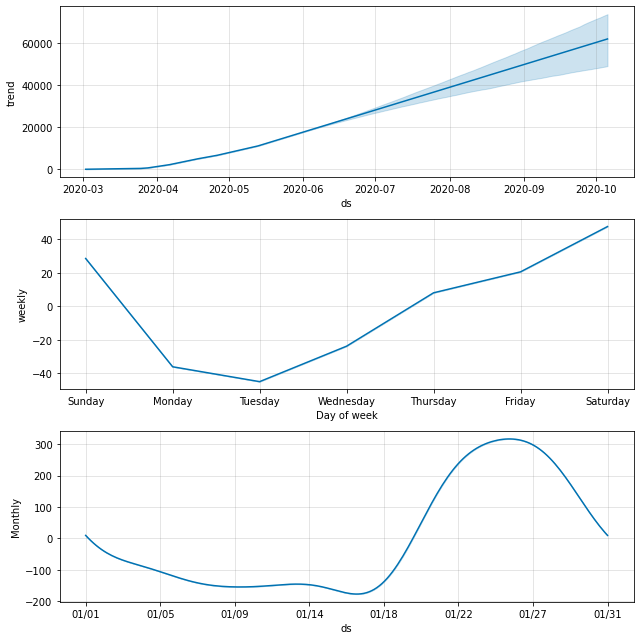

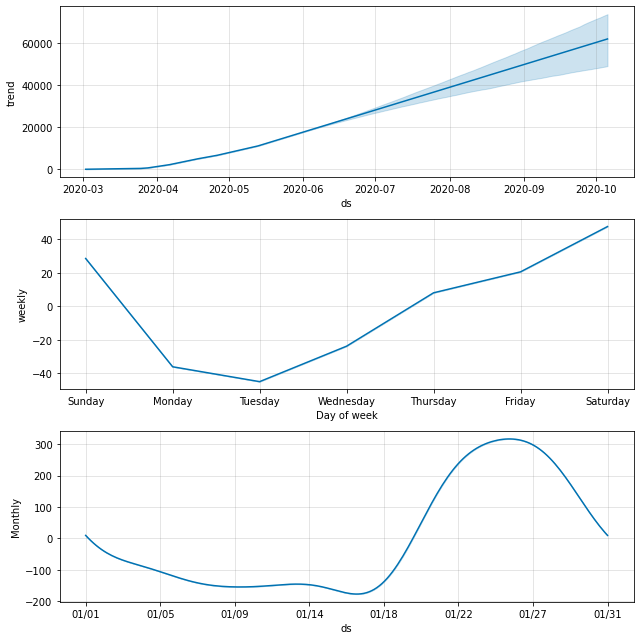

In [ ]:
model.plot_components(prediction)

In [ ]:
#Evaluating The Model Using R-Square

def check_metrics (test, prediction):
  R2_score = r2_score(test['y'], prediction['yhat'].iloc[divisor:])
  print(R2_score)

check_metrics(current_case_test, prediction)


ValueError: ignored

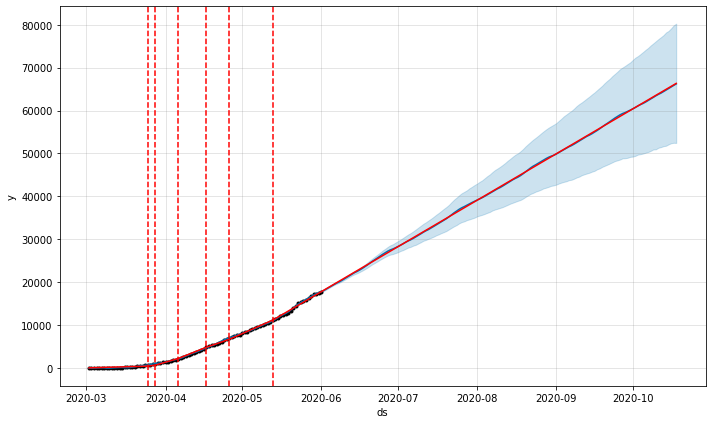

In [ ]:
#Looking Deeper into Points of Changes

from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
changes = add_changepoints_to_plot(fig.gca(), model, prediction)